In [43]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime

given_month = 8

def get_sentiment_change_mean(path, airline_id):
    df_conversations_raw = pd.read_csv(path,
                                 dtype={'id_str': 'str',
                                        'in_reply_to_screen_name':'str',
                                        'in_reply_to_status_id_str': 'str',
                                        'in_reply_to_user_id_str': 'str',
                                        'text': 'str',
                                        'timestamp_ms': 'float64',
                                        'user.id_str': 'str',
                                        'user.screen_name': 'str',
                                        'group_id': 'int'})
    
    def timestamp_to_datetime(i):
        if len(str(i)) < 13:
            a = np.nan
        else: 
            a = datetime.datetime.fromtimestamp(float(i)/1000.0, tz=datetime.timezone.utc)
        return a
    
    df_conversations_raw['date'] = df_conversations_raw['timestamp_ms'].apply(timestamp_to_datetime)
    df_conversations = df_conversations_raw[df_conversations_raw['date'].dt.month == given_month]
    
    df_conversations['group_id'] = df_conversations['in_reply_to_status_id_str'].isnull().cumsum()

    # Add the second index for each reply within each group
    df_conversations['reply_index'] = df_conversations.groupby('group_id').cumcount() + 1

    # Set the two indexes for the DataFrame
    df_conversations.set_index(['group_id', 'reply_index'], inplace=True)
            

    analyzer = SentimentIntensityAnalyzer()

    # Define a function to get the compound score for a sentence. Its range is from -1 to 1, with -1 being negative and 1 being positive. The range [-0.05, 0.05] is considered as neutral
    def get_sentiment_score(text):
        sentiment = analyzer.polarity_scores(text)
        return sentiment['compound']


    df_conversations['sentiment'] = df_conversations['text'].apply(get_sentiment_score)
    
    # Grouping by the first index of the MultiIndex
    grouped = df_conversations.groupby(level=0)

    # Filter conversations with at least 3 tweets
    filtered = grouped.filter(lambda x: len(x) >= 3)
    # Get the first level of the MultiIndex
    first_index = filtered.index.get_level_values(0)

    # Convert the first level to a list
    index_list = first_index.tolist()
    index_list = list(set(index_list))
    lst = []
    for i in index_list:
        for j in range(1,len(filtered.loc[i])):
            if (filtered.loc[i,j].loc['user.id_str'] != airline_id):
                id_variable = filtered.loc[i,j].loc['user.id_str']
                sentiment_variable = filtered.loc[i,j].loc['sentiment']
                for x in range(len(filtered.loc[i]),j+1,-1):
                    if (filtered.loc[i,x].loc['user.id_str'] == id_variable):
                        lst.append(filtered.loc[i,x].loc['sentiment'] - sentiment_variable)
                        break              
            break
    return sum(lst)/len(lst)


In [45]:
American_mean = get_sentiment_change_mean(r"C:\Users\sliwi\Documents\Courses\conversations_total_AmericanAir.csv", '22536055')

C:\Users\sliwi\AppData\Local\Temp/ipykernel_1640/3110955455.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conversations['group_id'] = df_conversations['in_reply_to_status_id_str'].isnull().cumsum()
C:\Users\sliwi\AppData\Local\Temp/ipykernel_1640/3110955455.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conversations['reply_index'] = df_conversations.groupby('group_id').cumcount() + 1
C:\Users\sliwi\AppData\Local\Temp/ipykernel_1640/3110955455.py:46: SettingWithCopyWarning: 
A value is tr

In [46]:
British_Airways_mean = get_sentiment_change_mean(r"C:\Users\sliwi\Documents\Courses\conversations_total_BA.csv", '18332190')

C:\Users\sliwi\AppData\Local\Temp/ipykernel_1640/3110955455.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conversations['group_id'] = df_conversations['in_reply_to_status_id_str'].isnull().cumsum()
C:\Users\sliwi\AppData\Local\Temp/ipykernel_1640/3110955455.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conversations['reply_index'] = df_conversations.groupby('group_id').cumcount() + 1
C:\Users\sliwi\AppData\Local\Temp/ipykernel_1640/3110955455.py:46: SettingWithCopyWarning: 
A value is tr

In [10]:
Air_France_mean = get_sentiment_change_mean(r"C:\Users\sliwi\Documents\Courses\conversations_total_AirFrance.csv", '106062176')

In [11]:
KLM_mean = get_sentiment_change_mean(r"C:\Users\sliwi\Documents\Courses\conversations_total_KLM.csv", '56377143')

In [12]:
Lufthansa_mean = get_sentiment_change_mean(r"C:\Users\sliwi\Documents\Courses\conversations_total_Lufthansa.csv", '124476322')

In [13]:
easyJet_mean = get_sentiment_change_mean(r"C:\Users\sliwi\Documents\Courses\conversations_total_easyJet.csv", '38676903')

In [14]:
RyanAir_mean = get_sentiment_change_mean(r"C:\Users\sliwi\Documents\Courses\conversations_total_RyanAir.csv", '1542862735')

In [15]:
SingaporeAir_mean = get_sentiment_change_mean(r"C:\Users\sliwi\Documents\Courses\conversations_total_SingaporeAir.csv", '253340062')

In [16]:
Qantas_mean = get_sentiment_change_mean(r"C:\Users\sliwi\Documents\Courses\conversations_total_Qantas.csv", '218730857')

In [17]:
EtihadAirways_mean = get_sentiment_change_mean(r"C:\Users\sliwi\Documents\Courses\conversations_total_EtihadAirways.csv", '45621423')

In [18]:
VirginAtlantic_mean = get_sentiment_change_mean(r"C:\Users\sliwi\Documents\Courses\conversations_total_VirginAtlantic.csv", '20626359')

In [19]:
sentiment_change_means = [[American_mean], [British_Airways_mean], [Air_France_mean], [KLM_mean], [Lufthansa_mean], [easyJet_mean], [RyanAir_mean], [SingaporeAir_mean], [Qantas_mean], [EtihadAirways_mean], [VirginAtlantic_mean]]

In [20]:
list_names = ['American', 'British_Airways', 'Air_France', 'KLM', 'Lufthansa', 'easyJet', 'RyanAir', 'SingaporeAir', 'Qantas', 'EtihadAirways', 'VirginAtlantic']

Text(0, 0.5, 'Avarage sentiment change')

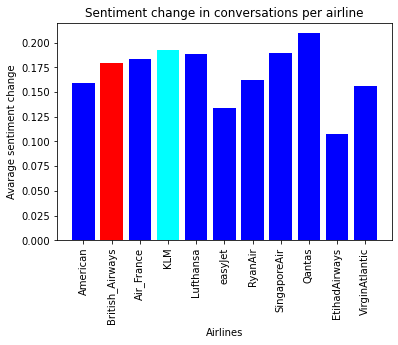

In [21]:
import matplotlib.pyplot as plt
dict_sentiment_change = {i:j for i,j in zip(list_names, sentiment_change_means)}
sentiment_change_per_airline = pd.DataFrame(dict_sentiment_change).transpose()
sentiment_change_per_airline = sentiment_change_per_airline.rename(columns = {0:'Mean Sentiment change'})
colours = ['blue', 'red', 'blue', 'cyan', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']
dict_colours = {i:j for i,j in zip(list_names, colours)}
fig1 = plt.figure(1)
plt.xticks(rotation=90)
plt.bar(sentiment_change_per_airline.index, sentiment_change_per_airline['Mean Sentiment change'], color=colours)
plt.title('Sentiment change in conversations per airline')
plt.xlabel('Airlines')
plt.ylabel('Avarage sentiment change')

